# Visualize results

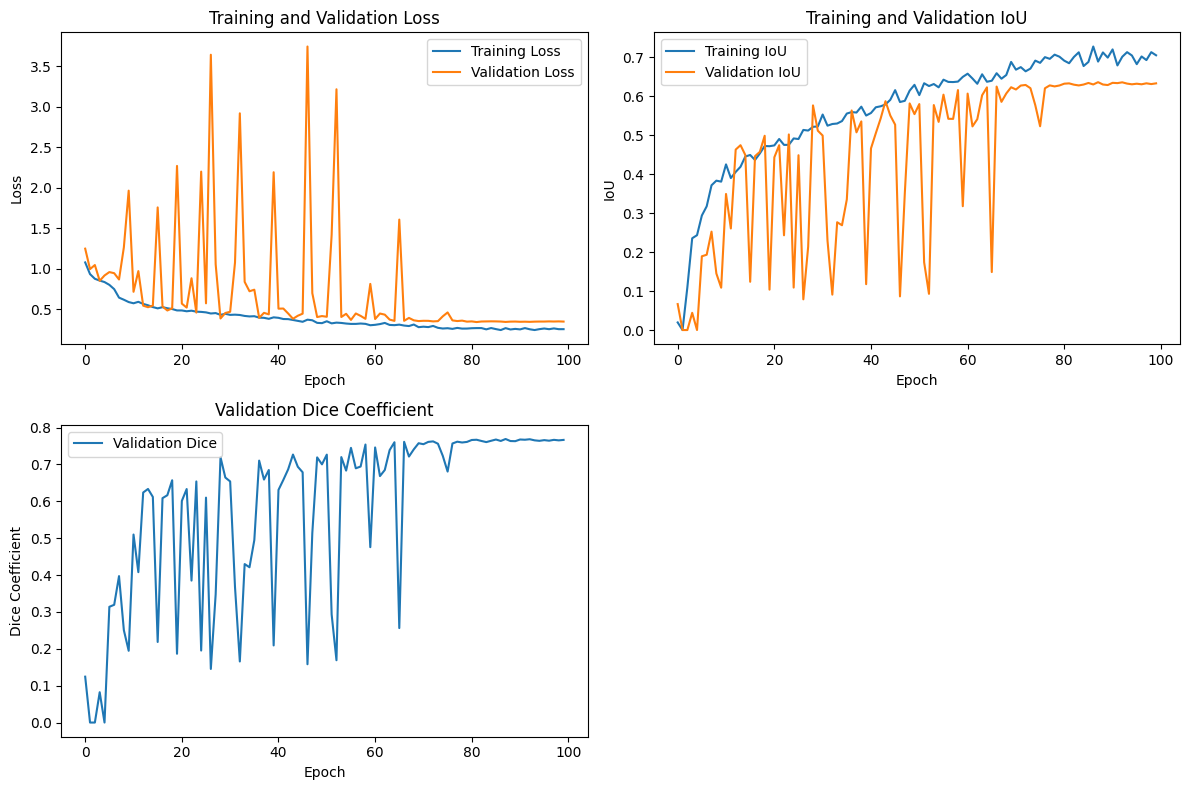

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Read CSV file
df = pd.read_csv('models/log.csv')

# Plotting
plt.figure(figsize=(12, 8))

# Loss
plt.subplot(2, 2, 1)
plt.plot(df['epoch'], df['loss'], label='Training Loss')
plt.plot(df['epoch'], df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# IoU
plt.subplot(2, 2, 2)
plt.plot(df['epoch'], df['iou'], label='Training IoU')
plt.plot(df['epoch'], df['val_iou'], label='Validation IoU')
plt.xlabel('Epoch')
plt.ylabel('IoU')
plt.title('Training and Validation IoU')
plt.legend()

# Dice coefficient
plt.subplot(2, 2, 3)
plt.plot(df['epoch'], df['val_dice'], label='Validation Dice')
plt.xlabel('Epoch')
plt.ylabel('Dice Coefficient')
plt.title('Validation Dice Coefficient')
plt.legend()

plt.tight_layout()
plt.show()


outputs/dev-2/0/077.jpg


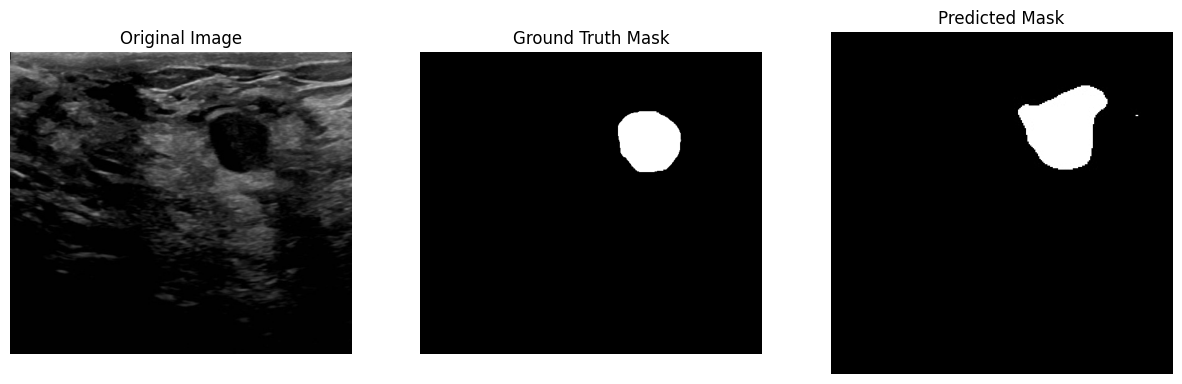

In [25]:
import os
import random
import cv2
import torch
import matplotlib.pyplot as plt
from glob import glob
from dataset import BUSIDataset

# Initialize parameters for the dataset
DATA_DIR = 'busi'
pred_mask_dir = 'outputs/dev-2/0'        # Path to predicted masks
img_ext = '.png'                 # Image file extension
mask_ext = '.png'                # Mask file extension
num_classes = 1                  # Number of classes in the mask (adjust if necessary)

# Load data
img_ids = glob(os.path.join(pred_mask_dir, '*' + 'jpg'))
img_ids = [os.path.splitext(os.path.basename(p))[0] for p in img_ids]


# Initialize the dataset
dataset = BUSIDataset(
        img_ids=img_ids,
        img_dir=os.path.join(DATA_DIR, 'images'),
        mask_dir=os.path.join(DATA_DIR, 'masks'),
        img_ext='.png',
        mask_ext='.png',
        num_classes=num_classes,
        transform=None)

# Randomly select an index
random_idx = random.randint(0, len(dataset) - 1)
img, mask, meta = dataset[random_idx]

# Load the corresponding predicted mask
pred_mask_path = os.path.join(pred_mask_dir, meta['img_id'] + '.jpg')
print(pred_mask_path)
pred_mask = cv2.imread(pred_mask_path, cv2.IMREAD_GRAYSCALE)
pred_mask = pred_mask.astype('float32') / 255

# Plotting the original image, ground truth mask, and predicted mask
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img.transpose(1, 2, 0))  # Transpose back for visualization
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(mask[0], cmap='gray')  # Assuming single channel mask
axes[1].set_title('Ground Truth Mask')
axes[1].axis('off')

axes[2].imshow(pred_mask, cmap='gray')  # Predicted mask
axes[2].set_title('Predicted Mask')
axes[2].axis('off')

plt.show()
